# WeatherPy
### This Jupyter Notebook file will visualize the weather of 500+ cities across the world of varying distance from the equator. 
To accomplish this, the notebook utilizes a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.
The notebook will build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

## _Results and Analysis_
* Temperature increases the closer one gets to the equator (i.e. latitude 0 degrees). The hottest part of the planet appears to be near the equator.
* Humidity and cloudiness do not appear to share any relationship with latitude. That is fairly surprising as I would have assumed there would have been a relationship between latitude and humidity.
* Moreover, wind speed does not appear to be related to latitude as the wind speed appears to be fairly low regardless of the latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate City List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Check the city count to confirm sufficient count (should be greater than 500)
if len(cities) > 500:
    print("There is a sufficient number of cities for our analysis.")

There is a sufficient number of cities for our analysis.


## Perform API calls

In [3]:
 # OpenWeatherMap API Key
api_key = api_keys.api_key

# Save config information for openweathermap API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# Create an "extracts" object to get the temperature, latitude,
# and longitude in each city
temp =[]
lat = []
lon = []
hum = []
cloud = []
wind = []

# store results in lists
for city in cities:
    current_json = requests.get(query_url + city).json()
    try:
        temp.append(float(current_json["main"]["temp"]))
        lat.append(float(current_json["coord"]["lat"]))
        lon.append(float(current_json["coord"]["lon"]))
        hum.append(float(current_json["main"]["humidity"]))
        cloud.append(float(current_json["clouds"]["all"]))
        wind.append(float(current_json["wind"]["speed"]))
        # print city number and city name
        print(f'{cities.index(city)}: Loading in weather information for {city}...')

    except:
        temp.append(None)
        lat.append(None)
        lon.append(None)
        hum.append(None)
        cloud.append(None)
        wind.append(None)
        # print city number and city name
        print(f'{cities.index(city)}: Could not load in weather information for {city}!!!')


## Create a Pandas DataFrame with the results
city_results_dict = {
    "City": cities,
    "Temperature (F)": temp,
    "Latitude": lat,
    "Longitude": lon,
    "Humidity": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wind
}

city_results_df = pd.DataFrame(city_results_dict)
city_results_df.head(5)

0: Loading in weather information for lukovetskiy...
1: Loading in weather information for yar-sale...
2: Loading in weather information for constitucion...
3: Loading in weather information for atuona...
4: Loading in weather information for la palma...
5: Loading in weather information for provideniya...
6: Loading in weather information for petropavlovsk-kamchatskiy...
7: Loading in weather information for banyo...
8: Loading in weather information for alice springs...
9: Loading in weather information for hilo...
10: Loading in weather information for vryheid...
11: Could not load in weather information for paradwip!!!
12: Loading in weather information for alofi...
13: Loading in weather information for avarua...
14: Loading in weather information for itarema...
15: Loading in weather information for kovdor...
16: Loading in weather information for san pedro...
17: Loading in weather information for tuktoyaktuk...
18: Loading in weather information for punta arenas...
19: Loading 

157: Loading in weather information for georgetown...
158: Loading in weather information for grants pass...
159: Loading in weather information for kyzyl-suu...
160: Loading in weather information for ponta do sol...
161: Loading in weather information for samarai...
162: Loading in weather information for atyashevo...
163: Loading in weather information for ishigaki...
164: Could not load in weather information for goteborg!!!
165: Loading in weather information for batagay-alyta...
166: Loading in weather information for yellowknife...
167: Loading in weather information for san quintin...
168: Loading in weather information for bambous virieux...
169: Loading in weather information for puerto palomas...
170: Could not load in weather information for tasbuget!!!
171: Loading in weather information for kedrovyy...
172: Loading in weather information for norrtalje...
173: Loading in weather information for cabinda...
174: Loading in weather information for mount gambier...
175: Loadin

311: Loading in weather information for hadejia...
312: Loading in weather information for george town...
313: Loading in weather information for velika kladusa...
314: Loading in weather information for abnub...
315: Loading in weather information for udomlya...
316: Loading in weather information for mallow...
317: Loading in weather information for hovd...
318: Loading in weather information for maltahohe...
319: Could not load in weather information for gangotri!!!
320: Loading in weather information for nome...
321: Loading in weather information for ketchikan...
322: Loading in weather information for dhrangadhra...
323: Loading in weather information for tubuala...
324: Loading in weather information for bridlington...
325: Loading in weather information for fortuna...
326: Loading in weather information for jizan...
327: Loading in weather information for parli...
328: Loading in weather information for the pas...
329: Loading in weather information for rio grande...
330: Loadi

468: Loading in weather information for niono...
469: Loading in weather information for nsanje...
470: Loading in weather information for hofn...
471: Loading in weather information for clyde river...
472: Loading in weather information for kotli loharan...
473: Loading in weather information for muros...
474: Loading in weather information for panacan...
475: Loading in weather information for bagotville...
476: Loading in weather information for olinda...
477: Loading in weather information for saint-leu...
478: Could not load in weather information for nguiu!!!
479: Loading in weather information for krynychky...
480: Loading in weather information for smidovich...
481: Loading in weather information for umea...
482: Loading in weather information for angra dos reis...
483: Loading in weather information for watertown...
484: Loading in weather information for broken hill...
485: Could not load in weather information for sentyabrskiy!!!
486: Loading in weather information for turay

623: Loading in weather information for usinsk...
624: Loading in weather information for oranjestad...
625: Loading in weather information for sioux lookout...
626: Loading in weather information for honiara...
627: Loading in weather information for ampanihy...
628: Loading in weather information for chara...
629: Could not load in weather information for rolim de moura!!!
630: Loading in weather information for mecca...


,City,Temperature (F),Latitude,Longitude,Humidity,Cloudiness (%),Wind Speed (mph)
0,lukovetskiy,51.80,64.29,41.92,100.0,20.0,2.59
1,yar-sale,42.24,66.83,70.83,100.0,44.0,12.77
2,constitucion,60.80,23.99,-104.67,87.0,90.0,8.05
3,atuona,79.68,-9.80,-139.03,100.0,0.0,16.80
4,la palma,72.93,5.36,-74.39,85.0,36.0,2.71


## Plot Latitude Relationships with Weather Information

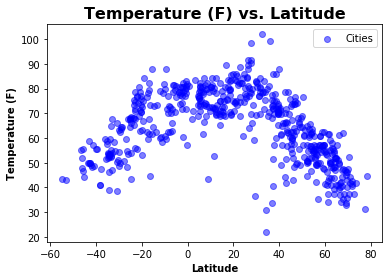

In [13]:
# plot 1: Temperature (F) vs. Latitude
plt1_x_axis = city_results_df["Latitude"]
plt1_y_axis = city_results_df["Temperature (F)"]

plt1 = plt.scatter(plt1_x_axis, plt1_y_axis, color="blue", 
                    label="Cities", alpha=0.5)

# set x and y axis labels
plt.xlabel('Latitude', fontweight="bold")
plt.ylabel('Temperature (F)', fontweight="bold")

# give the graph a title and legend
plt.title('Temperature (F) vs. Latitude', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)

# save image of plot to png file
plt.savefig('/Users/finianoneill/Desktop/UCB_Bootcamp/Homework/Week6_APIs_HW/weatherpy/Outputs/temp_vs_latitude.png')

plt.show()

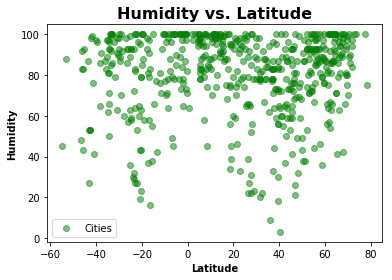

In [14]:
# plot 2: Humidity (%) vs. Latitude
plt2_x_axis = city_results_df["Latitude"]
plt2_y_axis = city_results_df["Humidity"]

plt2 = plt.scatter(plt2_x_axis, plt2_y_axis, color="green", 
                    label="Cities", alpha=0.5)

# set x and y axis labels
plt.xlabel('Latitude', fontweight="bold")
plt.ylabel('Humidity', fontweight="bold")

# give the graph a title and legend
plt.title('Humidity vs. Latitude', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)

# save image of plot to png file
plt.savefig('/Users/finianoneill/Desktop/UCB_Bootcamp/Homework/Week6_APIs_HW/weatherpy/Outputs/humidity_vs_latitude.png')

plt.show()

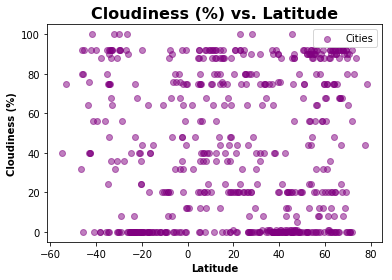

In [15]:
# plot 3: Cloudiness (%) vs. Latitude
plt3_x_axis = city_results_df["Latitude"]
plt3_y_axis = city_results_df["Cloudiness (%)"]

plt3 = plt.scatter(plt3_x_axis, plt3_y_axis, color="purple", 
                    label="Cities", alpha=0.5)

# set x and y axis labels
plt.xlabel('Latitude', fontweight="bold")
plt.ylabel('Cloudiness (%)', fontweight="bold")

# give the graph a title and legend
plt.title('Cloudiness (%) vs. Latitude', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)

# save image of plot to png file
plt.savefig('/Users/finianoneill/Desktop/UCB_Bootcamp/Homework/Week6_APIs_HW/weatherpy/Outputs/cloudiness_vs_latitude.png')

plt.show()

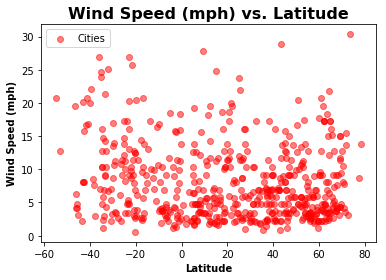

In [16]:
# plt1 = scatter plot of Temperature (F) vs. Latitude
# plt2 = scatter plot of Humidity (%) vs. Latitude
# plt3 = scatter plot of Cloudiness (%) vs. Latitude
# plt4 = scatter plot of Wind Speed (mph) vs. Latitude
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=False)

# plot 4: Wind Speed (mph) vs. Latitude
plt4_x_axis = city_results_df["Latitude"]
plt4_y_axis = city_results_df["Wind Speed (mph)"]

plt4 = plt.scatter(plt4_x_axis, plt4_y_axis, color="red", 
                    label="Cities", alpha=0.5)

# set x and y axis labels
plt.xlabel('Latitude', fontweight="bold")
plt.ylabel('Wind Speed (mph)', fontweight="bold")

# give the graph a title and legend
plt.title('Wind Speed (mph) vs. Latitude', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)

# save image of plot to png file
plt.savefig('/Users/finianoneill/Desktop/UCB_Bootcamp/Homework/Week6_APIs_HW/weatherpy/Outputs/windspeed_vs_latitude.png')

plt.show()

## Export Data and Results to Output Files

In [12]:
# export csv of the data frame with all city and weather information
city_results_df.to_csv("Outputs/city_weather_info.csv")